# COVID Testing and Vaccines and Health Equity 
### verify Corona Plaza late night entries 

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = "{:,.0f}".format


In [75]:
# Load data from 04-06-2019, data is loaded on Saturdays.
# Source: http://web.mta.info/developers/turnstile.html

def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], usecols = [0,1,2,3,4,6,7,9], keep_date_col=True))
    return pd.concat(dfs)

# Create a datetime column using data from columns DATE and TIME during import
week_nums = [190406]
turnstiles_df = get_data_parse_dt(week_nums)
turnstiles_df.tail()

# 190413, 190420, 190427, 190504, 190511, 190518, 190525, 190601, 190608, 190615, 190622, 190629, 190706

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES
202959,2019-04-05 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,04/05/2019,05:00:00,5554
202960,2019-04-05 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,04/05/2019,09:00:00,5554
202961,2019-04-05 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,04/05/2019,13:00:00,5554
202962,2019-04-05 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,04/05/2019,17:00:00,5554
202963,2019-04-05 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,04/05/2019,21:00:00,5554


In [76]:
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE',
       'TIME', 'ENTRIES'],
      dtype='object')

In [77]:
# Strip whitespace from column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE',
       'TIME', 'ENTRIES'],
      dtype='object')

In [78]:
turnstiles_df.head(1)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES
0,2019-03-30,A002,R051,02-00-00,59 ST,NQR456W,03/30/2019,00:00:00,6999064


In [79]:
# Looking for station of interest: Elmhurst Avenue, Queens 
df = turnstiles_df[turnstiles_df['STATION'].str.contains('CORONA', na=False)] 
df.head(1)
# Station name as recorded in dataset: 103 ST-CORONA

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES
186603,2019-03-30,R529,R208,00-00-00,103 ST-CORONA,7,03/30/2019,00:00:00,15512586


In [80]:
# Mask selects stations of interest 
station_mask = ((turnstiles_df['STATION'] == '103 ST-CORONA'))


In [85]:
station_df = turnstiles_df[station_mask]
station_df.STATION.unique()
# station_df
# confirm station_df has data from Corona

array(['103 ST-CORONA'], dtype=object)

In [86]:
# station_date_df = station_df[date_mask]
station_df.STATION.unique()
# comfirm station_date_df has dates from March 31 – June 30, 2019

array(['103 ST-CORONA'], dtype=object)

In [87]:
# Mask selects the interval between 12:00 AM and 4:00 AM from the selected station data df
time_mask = (station_df['TIME'] == '04:00:00')

In [88]:
station_time_df = station_df[time_mask]
station_time_df.TIME.unique()
# confirm station_time_df has data from the 4:00 AM interval

array(['04:00:00'], dtype=object)

In [89]:
# station_date_time_df has 138 entries with no null values, and data_time column is a dt datatype
station_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 186604 to 186976
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE_TIME  63 non-null     datetime64[ns]
 1   C/A        63 non-null     object        
 2   UNIT       63 non-null     object        
 3   SCP        63 non-null     object        
 4   STATION    63 non-null     object        
 5   LINENAME   63 non-null     object        
 6   DATE       63 non-null     object        
 7   TIME       63 non-null     object        
 8   ENTRIES    63 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.9+ KB


In [90]:
highest_burden_df = station_time_df.reset_index()
highest_burden_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES
0,186604,2019-03-30 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/30/2019,04:00:00,15512609
1,186610,2019-03-31 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/31/2019,04:00:00,15513763
2,186616,2019-04-01 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,04/01/2019,04:00:00,15514631
3,186622,2019-04-02 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,04/02/2019,04:00:00,15516489
4,186628,2019-04-03 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,04/03/2019,04:00:00,15518452


In [91]:
# highest_burden_daily_df = (highest_burden_df
#                            .groupby(["STATION", "DATE"])[['DAILY_ENTRIES']]
#                            .sum().reset_index())

turnstiles = (highest_burden_df.groupby(['STATION'])['SCP'].count())
turnstiles

STATION
103 ST-CORONA    63
Name: SCP, dtype: int64

In [92]:
# Create new columns for the previous date and entries. 
# Apply a shift to calculate the previous day's entries. 

highest_burden_df[['PREV_DATE', 'PREV_ENTRIES']] = (highest_burden_df
                                                  .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                  .apply(lambda grp: grp.shift(1)))
highest_burden_df.head(2)

/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_6296/2876039067.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  highest_burden_df[['PREV_DATE', 'PREV_ENTRIES']] = (highest_burden_df


,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,186604,2019-03-30 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/30/2019,04:00:00,15512609,NaN,NaN
1,186610,2019-03-31 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/31/2019,04:00:00,15513763,03/30/2019,"15,512,609"


In [93]:
# Drop row with the March 31, 2019 data, used it to calculate the previous entries, no longer neeeded. 
highest_burden_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
highest_burden_df.head(2)

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1,186610,2019-03-31 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/31/2019,04:00:00,15513763,03/30/2019,"15,512,609"
2,186616,2019-04-01 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,04/01/2019,04:00:00,15514631,03/31/2019,"15,513,763"


In [94]:
# How many stations have a counter going in reverse? 
(highest_burden_df[highest_burden_df["ENTRIES"] < highest_burden_df["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

Series([], dtype: int64)

In [105]:
# Adjust counter before calculating daily entries
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

highest_burden_df["LATE_NIGHT_ENTRIES"] = highest_burden_df.apply(get_daily_counts, axis=1, max_counter=10_00_000)
highest_burden_df.sort_values('DATE')


,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,LATE_NIGHT_ENTRIES
1,186610,2019-03-31 04:00:00,R529,R208,00-00-00,103 ST-CORONA,7,03/31/2019,04:00:00,15513763,03/30/2019,"15,512,609","1,154"
22,186736,2019-03-31 04:00:00,R529,R208,00-00-03,103 ST-CORONA,7,03/31/2019,04:00:00,1119904,03/30/2019,"1,118,270","1,634"
36,186820,2019-03-31 04:00:00,R529,R208,00-05-00,103 ST-CORONA,7,03/31/2019,04:00:00,12385878,03/30/2019,"12,383,669","2,209"
43,186862,2019-03-31 04:00:00,R529,R208,00-05-01,103 ST-CORONA,7,03/31/2019,04:00:00,11010949,03/30/2019,"11,009,332","1,617"
15,186694,2019-03-31 04:00:00,R529,R208,00-00-02,103 ST-CORONA,7,03/31/2019,04:00:00,2221375,03/30/2019,"2,220,165","1,210"
50,186904,2019-03-31 04:00:00,R529,R208,00-06-00,103 ST-CORONA,7,03/31/2019,04:00:00,3944675,03/30/2019,"3,943,782",893
29,186778,2019-03-31 04:00:00,R529,R208,00-00-04,103 ST-CORONA,7,03/31/2019,04:00:00,5485184,03/30/2019,"5,482,462","2,722"
57,186946,2019-03-31 04:00:00,R529,R208,00-06-01,103 ST-CORONA,7,03/31/2019,04:00:00,4522547,03/30/2019,"4,521,625",922
8,186652,2019-03-31 04:00:00,R529,R208,00-00-01,103 ST-CORONA,7,03/31/2019,04:00:00,14268856,03/30/2019,"14,267,743","1,113"
9,186658,2019-04-01 04:00:00,R529,R208,00-00-01,103 ST-CORONA,7,04/01/2019,04:00:00,14269620,03/31/2019,"14,268,856",764


In [136]:
# time_mask = (station_df['TIME'] == '04:00:00')
# Look at one day at Corona: 
# how many turnstiles? 9 turnstiles
# really 20k people? at late-night?

# '03/31/2019') # 13474 #U
# '04/01/2019') #  9757 #M
# '04/02/2019') # 20305 #T
# '04/03/2019') # 20576 #W
# '04/04/2019') # 20974 #H
# '04/05/2019') # 21008 #F

one_day_mask = (highest_burden_df['DATE'] == '04/01/2019') # 13474
one_day = highest_burden_df[one_day_mask]
one_day
one_day_total = one_day.LATE_NIGHT_ENTRIES.sum()
one_day_total

9757.0

In [137]:
# Sum all turnstiles per station
highest_burden_daily_df = (highest_burden_df
                           .groupby(["STATION", "DATE"])[['LATE_NIGHT_ENTRIES']]
                           .sum().reset_index())
highest_burden_daily_df.head()

# Reduces dataframe from 2,380 to 271 rows as expected (3 stations * 90 days per station)

,STATION,DATE,LATE_NIGHT_ENTRIES
0,103 ST-CORONA,03/31/2019,"13,474"
1,103 ST-CORONA,04/01/2019,"9,757"
2,103 ST-CORONA,04/02/2019,"20,305"
3,103 ST-CORONA,04/03/2019,"20,576"
4,103 ST-CORONA,04/04/2019,"20,974"


In [138]:
# Add day of week and week number to dataframe in new columns
highest_burden_daily_df['DAY_OF_WEEK_NUM'] = pd.to_datetime(highest_burden_daily_df['DATE']).dt.dayofweek
# highest_burden_daily_df['WEEK_OF_YEAR'] = pd.to_datetime(highest_burden_daily_df['DATE']).dt.isocalendar().week
highest_burden_daily_df.head(20)

,STATION,DATE,LATE_NIGHT_ENTRIES,DAY_OF_WEEK_NUM
0,103 ST-CORONA,03/31/2019,"13,474",6
1,103 ST-CORONA,04/01/2019,"9,757",0
2,103 ST-CORONA,04/02/2019,"20,305",1
3,103 ST-CORONA,04/03/2019,"20,576",2
4,103 ST-CORONA,04/04/2019,"20,974",3
5,103 ST-CORONA,04/05/2019,"21,008",4


In [139]:
# Add column ROLLING_MEAN to capture the rolling mean (by 7) for each station group
highest_burden_daily_df['ROLLING_MEAN'] = (highest_burden_daily_df
                                           .groupby('STATION')['LATE_NIGHT_ENTRIES']
                                           .transform(lambda x: x.rolling(7,1).mean()))
highest_burden_daily_df.head(2)                    

,STATION,DATE,LATE_NIGHT_ENTRIES,DAY_OF_WEEK_NUM,ROLLING_MEAN
0,103 ST-CORONA,03/31/2019,"13,474",6,"13,474"
1,103 ST-CORONA,04/01/2019,"9,757",0,"11,616"


In [140]:
weekly_averages = (highest_burden_daily_df
               .groupby(['STATION','DAY_OF_WEEK_NUM'])['LATE_NIGHT_ENTRIES']
               .mean())
weekly_averages.head(2)

STATION        DAY_OF_WEEK_NUM
103 ST-CORONA  0                  9,757
               1                 20,305
Name: LATE_NIGHT_ENTRIES, dtype: float64

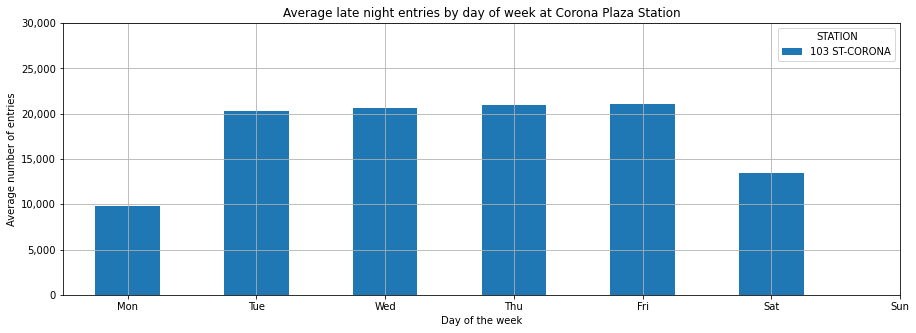

In [141]:
weekly_averages.unstack(level=0).plot(kind='bar', 
                                      subplots=False, 
                                      rot=0, 
                                      figsize=(15, 5), 
                                      layout=(1, 3), 
                                      xlabel=('Day of the week'),
                                      ylabel=('Average number of entries'),
                                      title=('Average late night entries by day of week at Corona Plaza Station')
                                     );
                                 
xpositions = (0,1,2,3,4,5,6)
xlabels = ('Mon', 'Tue','Wed','Thu', 'Fri', 'Sat', 'Sun')
plt.xticks(xpositions, xlabels)

ypositions = (0,5000, 10000, 15000, 20000, 25000, 30000)
ylabels = ('0','5,000', '10,000', '15,000', '20,000', '25,000', '30,000')
plt.yticks(ypositions, ylabels)

plt.grid();

